In [2]:
#Exercise for k means tutorial
#1.Use iris flower dataset from sklearn library and try to form clusters 
# of flowers using petal width and length features. Drop other two features
# for simplicity.
#2.Figure out if any preprocessing such as scaling would help here
#3.Draw elbow plot and from that figure out optimal value of k

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
iris=load_iris()

In [5]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()
#pd.DataFrame() converts iris.data (NumPy array) into a structured DataFrame.
#columns=iris.feature_names assigns proper column names:

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data['flower']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
data.drop(['sepal length (cm)',
           'sepal width (cm)',
           'flower'],axis='columns',
            inplace=True)

In [8]:
data.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


Text(0, 0.5, 'petal width (cm)')

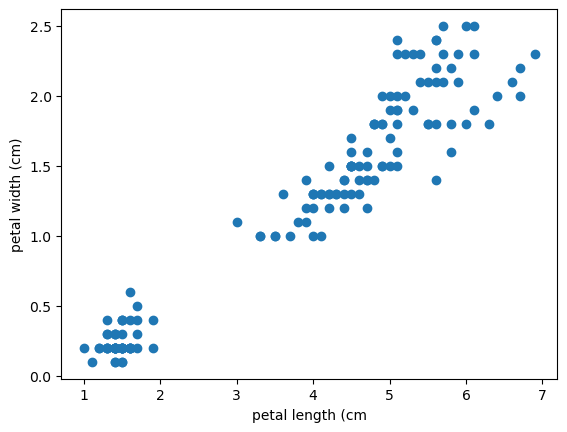

In [9]:
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])
plt.xlabel('petal length (cm')
plt.ylabel('petal width (cm)')

In [10]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(data)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#New column is created
data['cluster']=y_predict
data.head(3)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0


In [12]:
data.cluster.unique()

array([0, 1, 2])

In [13]:
#data1 = data[data.clusters == 0]  # Filter data points belonging to Cluster 0
#data.clusters == 0 selects rows where the clusters column is 0.

#This creates three new DataFrames (data1, data2, data3) containing points
#from different clusters.

#plt.scatter(x, y, color='color_name') plots points with Age on X-axis and Income on Y-axis.
#Different colors are used to differentiate clusters:
#Green for Cluster 0
#Red for Cluster 1
#Black for Cluster 2

In [14]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

In [15]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [4.29259259, 1.35925926],
       [5.62608696, 2.04782609]])

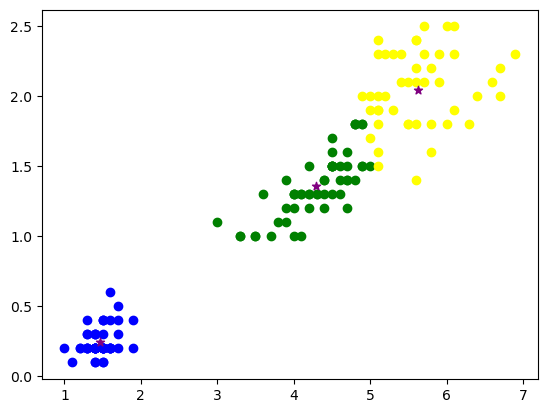

In [16]:
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='blue')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='green')
plt.scatter(data3['petal length (cm)'],data3['petal width (cm)'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            
            color='purple',marker='*',
            label='centroid')

In [17]:
	#######Elbow Plot##############

In [18]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)
sse

[646.7886666666666,
 111.99687462863935,
 31.412885668276978,
 22.175307806324113,
 14.337482913165266,
 12.083842857142859,
 9.561091269841272,
 8.0948940406572,
 8.274693168673432]

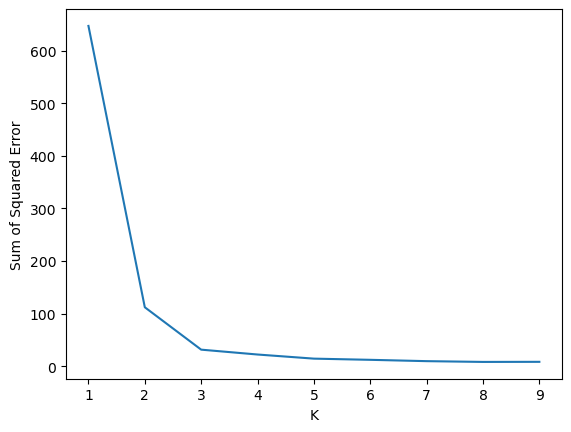

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)